<a href="https://colab.research.google.com/github/20173132hanaram/-/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_train[1]

0

In [ ]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255

In [ ]:
Y_train[3]

1

In [ ]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)

In [ ]:
Y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
input_size = 784
batch_size = 100    
hidden_neurons = 400    
epochs = 5

In [ ]:
model = Sequential()     


test_mode = 0

if test_mode ==0:
    model.add(Dense(hidden_neurons, input_dim=input_size)) 
    model.add(Activation('relu'))     
    model.add(Dense(classes)) 
    model.add(Activation('softmax'))
else:
    model.add(Dense(classes, input_dim=input_size))
    model.add(Activation('softmax'))

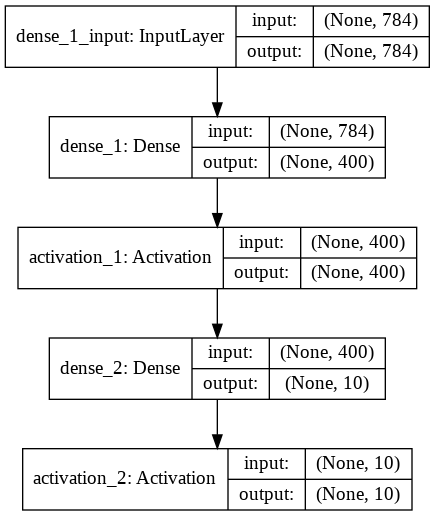

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2859 - accuracy: 0.9188
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1250 - accuracy: 0.9632
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0859 - accuracy: 0.9752
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0644 - accuracy: 0.9821
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0514 - accuracy: 0.9851


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 51us/step

Test accuracy: 0.9794999957084656
